##Software Cost Estimation Part 1

In [1]:
import math
from scipy.io import arff
import pandas as pd
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from scipy.stats import expon
from scipy import stats
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
df_fp = pd.read_excel('C:/Users/user/Downloads/fp.xlsx', delim_whitespace = True,
names=['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions','Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust','Language']
)
df_fp.dataframeName = 'fp.xlsx'
labels = list('AB')

**Descripción del dataset:**

In [2]:
df_fp.head(10)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1
5,6,6,0,0,86,4,2821,97,89,186,38,192,1
6,7,7,2,1,85,9,2569,119,42,161,25,145,2
7,8,8,1,2,83,13,3913,186,52,238,25,214,1
8,9,9,3,1,85,12,7854,172,88,260,30,247,1
9,10,10,3,4,83,4,2422,78,38,116,24,103,1


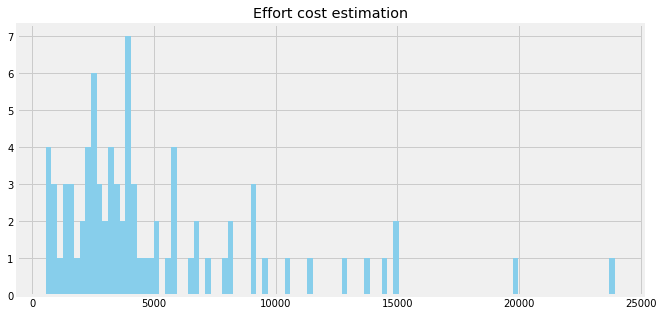

In [3]:
plt.figure(figsize=(10,5))
plt.title('Effort cost estimation')
plt.grid(True)
plt.hist(df_fp.Effort, bins = 100, alpha=1, color = "skyblue",  linewidth=1)
plt.show()

**Histograma  "Entities"**

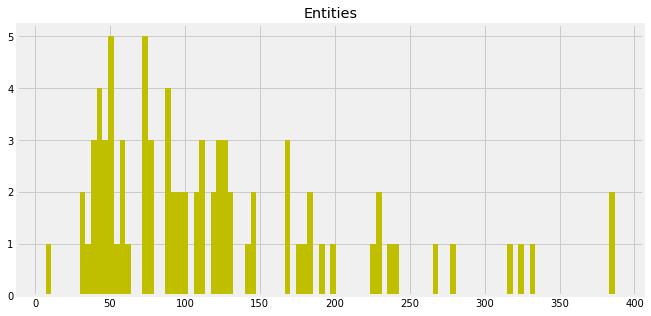

In [4]:
plt.figure(figsize=(10,5))
plt.title('Entities')
plt.grid(True)
plt.hist(df_fp.Entities, bins = 100, alpha=1, color = "y",  linewidth=1)
plt.show()

**Histograma  "Transactions "**

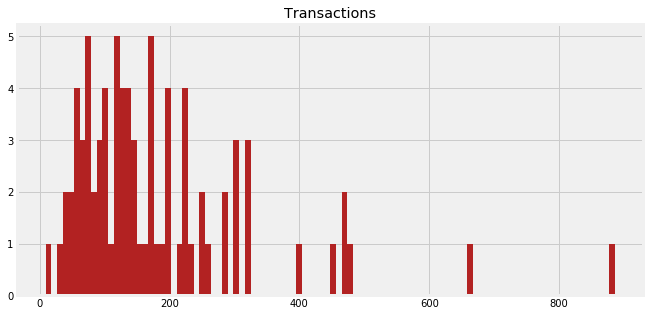

In [5]:
plt.figure(figsize=(10,5))
plt.title('Transactions')
plt.grid(True)
plt.hist(df_fp.Transactions, bins = 100, alpha=1, color = "firebrick",  linewidth=1)
plt.show()



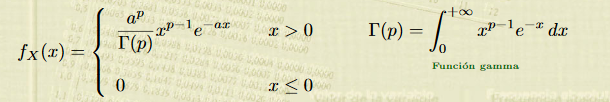



In [6]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [7]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

**Graficando la  distribución  de algunas columnas del data set:**

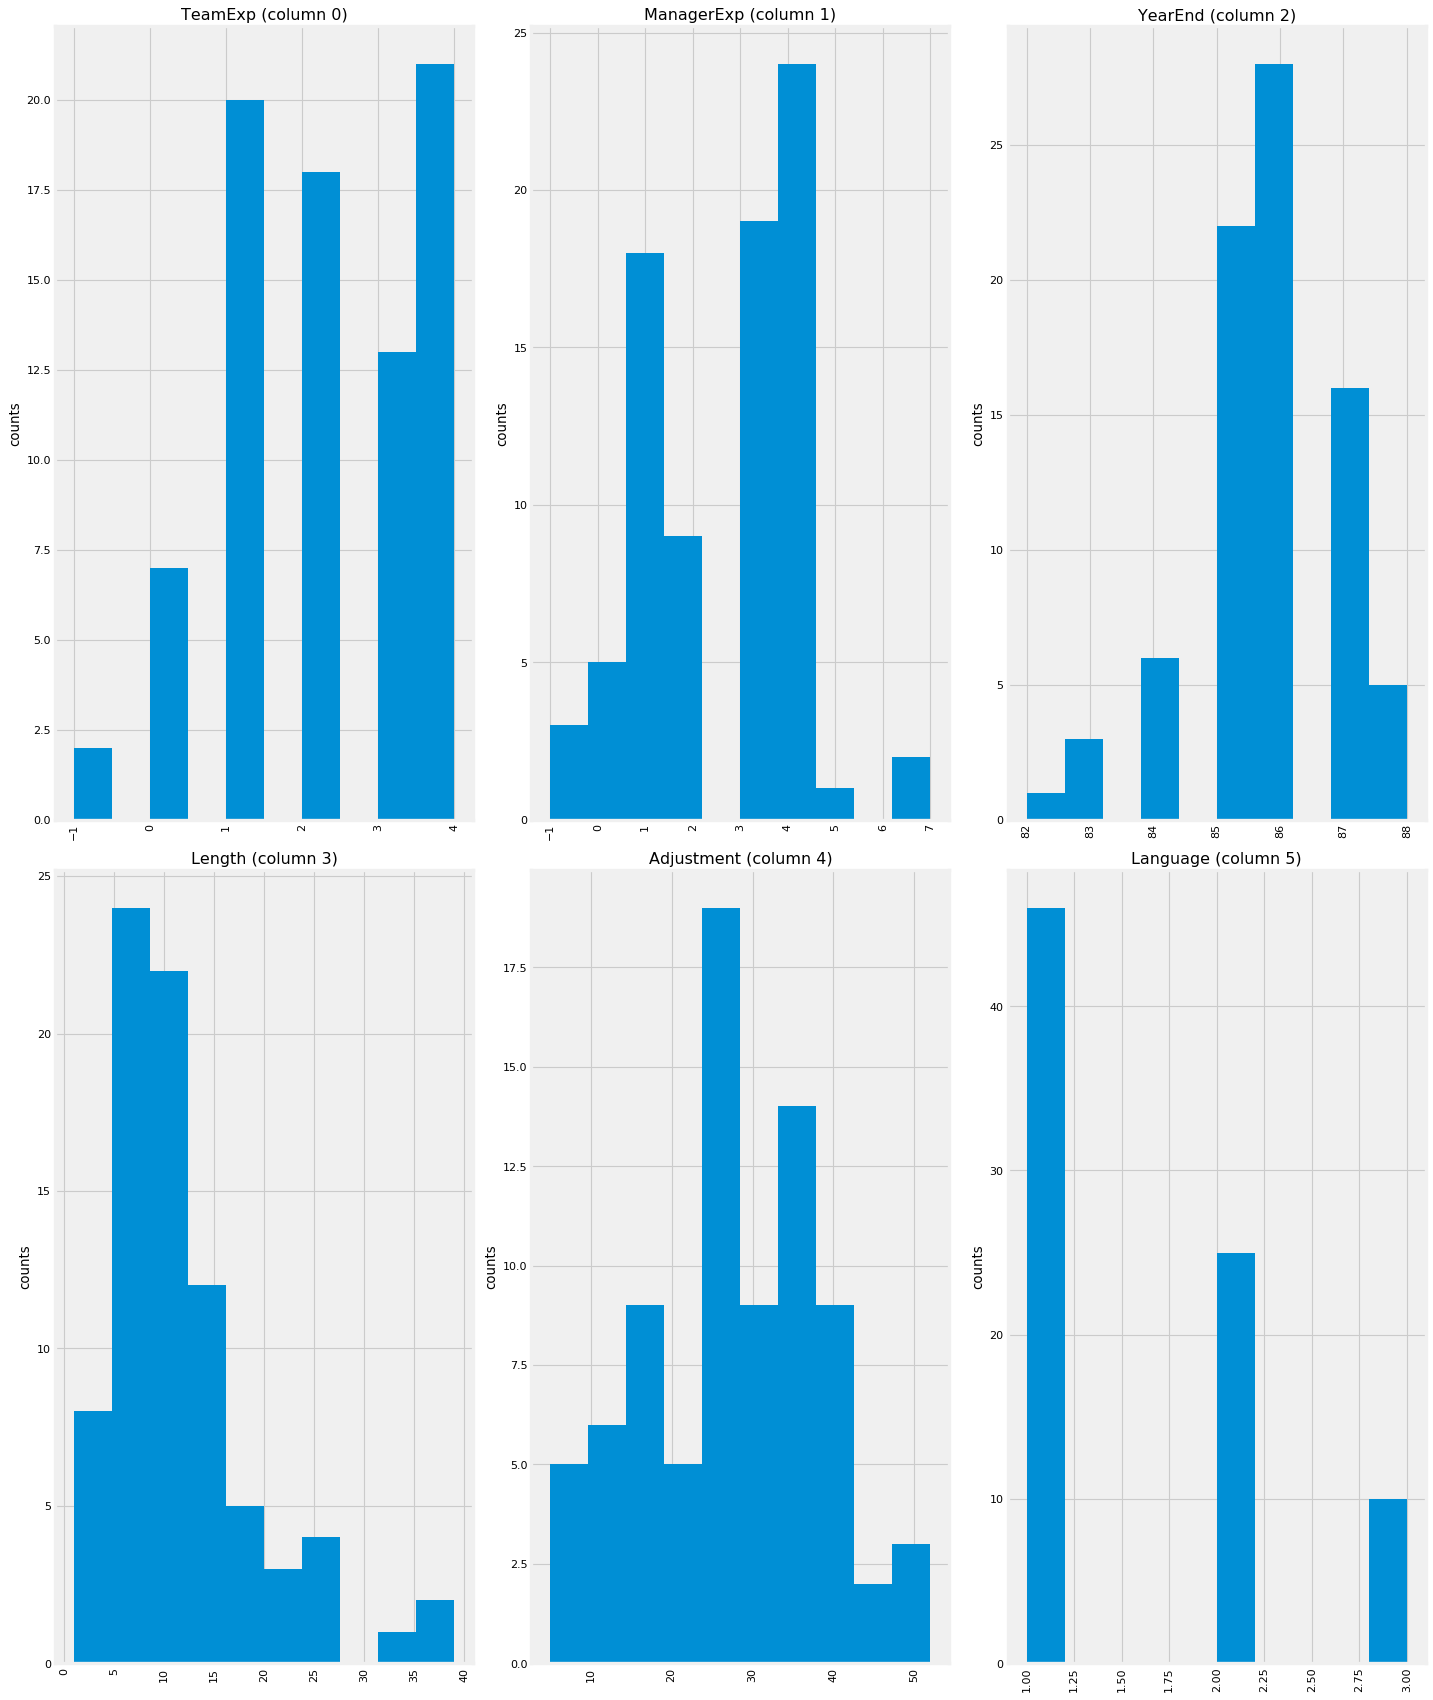

In [9]:
plotPerColumnDistribution(df_fp, 10, 3)

Grafiquemos sólo el esfuerzo: 



C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


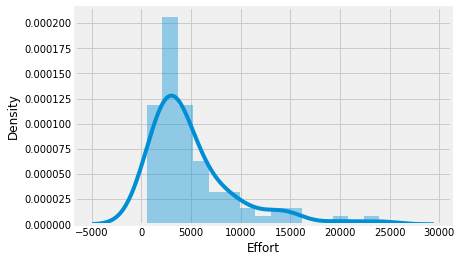

In [10]:
sns.distplot(df_fp.Effort);

Calculamos la estadística básica relacionada con el esfuerzo, el número de transaciones, la experiencia del equipo y la experiencia del líder del proyecto, respectivamente:

In [11]:
print (df_fp.Effort.describe())
print (df_fp.Transactions.describe())
print (df_fp.TeamExp.describe())
print (df_fp.ManagerExp.describe())

count       81.000000
mean      5046.308642
std       4418.767228
min        546.000000
25%       2352.000000
50%       3647.000000
75%       5922.000000
max      23940.000000
Name: Effort, dtype: float64
count     81.000000
mean     182.123457
std      144.035098
min        9.000000
25%       88.000000
50%      140.000000
75%      224.000000
max      886.000000
Name: Transactions, dtype: float64
count    81.000000
mean      2.185185
std       1.415195
min      -1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       4.000000
Name: TeamExp, dtype: float64
count    81.000000
mean      2.530864
std       1.643825
min      -1.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: ManagerExp, dtype: float64


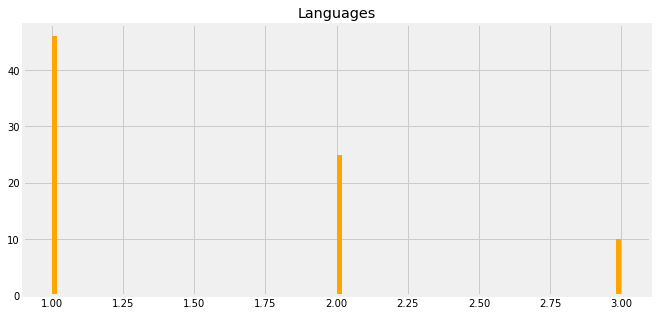

In [12]:
plt.figure(figsize=(10,5))
plt.title('Languages')
plt.grid(True)
plt.hist(df_fp.Language, bins = 100, alpha=1,  linewidth=1, color=['orange'])
plt.show()

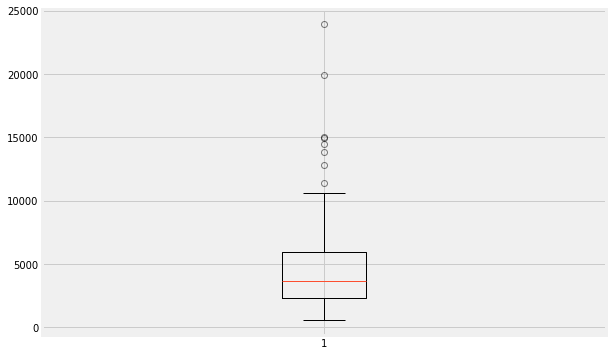

In [13]:
# Esfuerzo
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_fp.Effort)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)


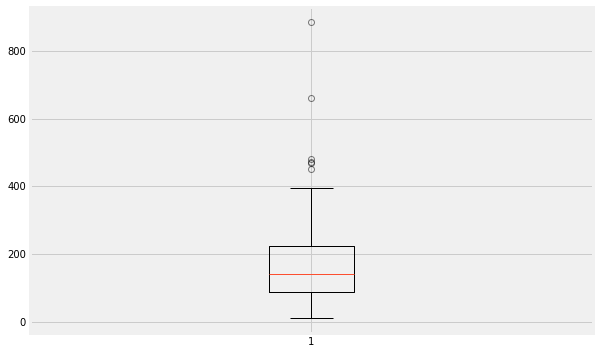

In [14]:
#Numero de transaciones
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_fp.Transactions)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

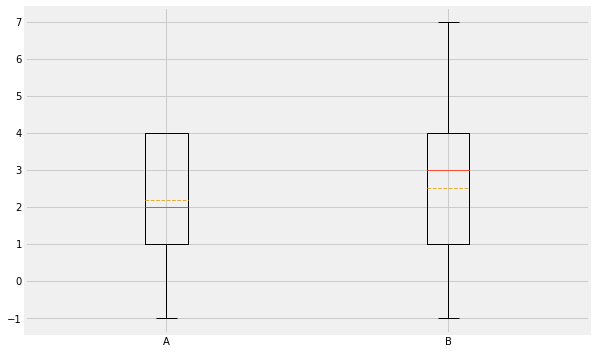

In [15]:
#Experiencia del equipo (A), experiencia del lider (B).
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
data_to_plot = [df_fp.TeamExp, df_fp.ManagerExp]
bp = ax.boxplot(data_to_plot, labels=labels,showmeans=True, meanline=True)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

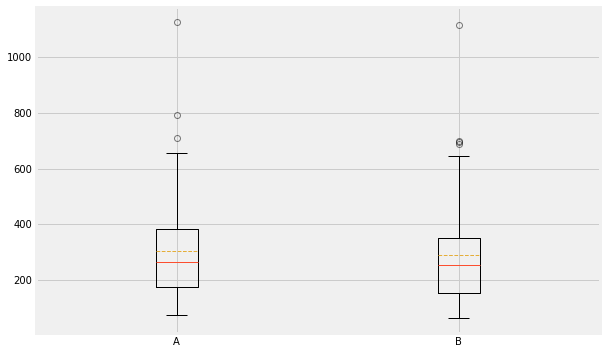

In [16]:
#Puntos de Funcion no ajustados (A), Ajustados (B).
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
data_to_plot = [df_fp.PointsNonAdjust, df_fp.PointsAjust]
bp = ax.boxplot(data_to_plot, labels=labels,showmeans=True, meanline=True)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)